In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import fibsem
from fibsem.imaging import masks
from fibsem.imaging import utils
from autoscript_sdb_microscope_client.structures import AdornedImage

import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage.segmentation import watershed
from skimage.feature import peak_local_max



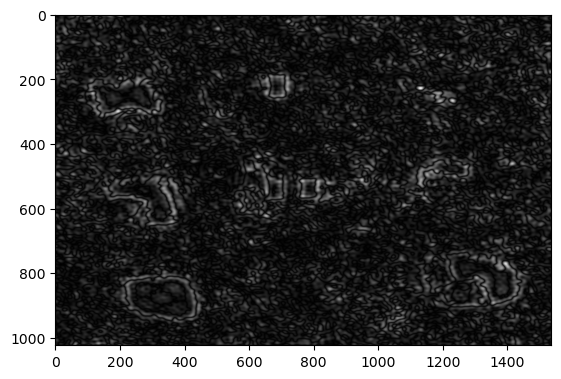

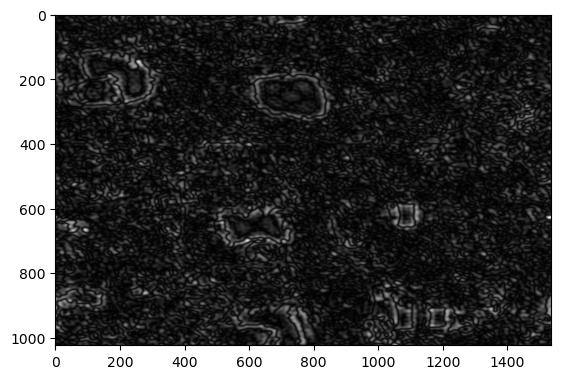

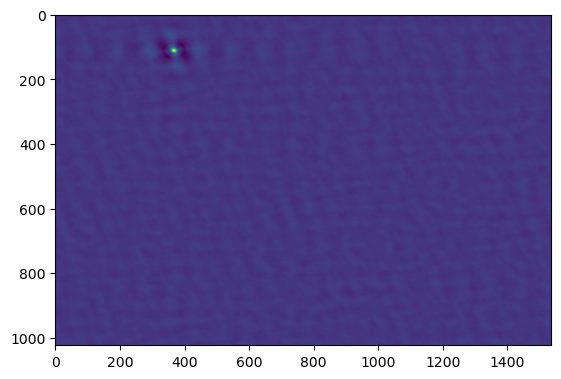

In [4]:
img1 = mpimg.imread("C:/Users/phipo/Documents/GitHub/PIE scope/test/20220202.161324/01_eb_drift_correction_lamella_low_res_0_eb.tif")
img2 = mpimg.imread("C:/Users/phipo/Documents/GitHub/PIE scope/test/20220202.161324/01_eb_drift_correction_lamella_low_res_0_ib.tif")

img1 = AdornedImage(img1, None)
#img2 = AdornedImage(img2, None)
img2 = AdornedImage(np.roll(img1.data, shift=(400, 400), axis=(0, 1)))

pixelsize_img1 = img1.data.shape
pixelsize_img2 = img2.data.shape

img1_mask = masks.create_bandpass_mask(pixelsize_img1, 100, 4, 3)
img2_mask = masks.create_bandpass_mask(pixelsize_img2, 100, 4, 3)
masks.create_bandpass_mask()

img1fft = np.fft.ifftshift(img1_mask * np.fft.fftshift(np.fft.fft2(img1.data)))
img2fft = np.fft.ifftshift(img2_mask * np.fft.fftshift(np.fft.fft2(img2.data)))


plt.imshow(np.abs(np.fft.fftshift(np.fft.ifftshift(np.fft.ifft2(img1fft)))), cmap='gray')
plt.show()
plt.imshow(np.abs(np.fft.fftshift(np.fft.ifftshift(np.fft.ifft2(img2fft)))), cmap='gray')
plt.show()

n_pixels = img1.data.shape[0] * img1.data.shape[1]
img1fft[0, 0] = 0
tmp = img1fft * np. conj(img1fft)
img1fft = n_pixels * img1fft / np.sqrt(tmp.sum())

n_pixels = img2.data.shape[0] * img2.data.shape[1]
img2fft[0, 0] = 0
tmp = img2fft * np. conj(img2fft)
img2fft = n_pixels * img2fft / np.sqrt(tmp.sum())

xcorr = np.real(np.fft.fftshift(np.fft.ifft2(img1fft * np.conj(img2fft))))
plt.imshow(xcorr)
plt.show()


In [5]:
maxX, maxY = np.unravel_index(np.argmax(xcorr), xcorr.shape)
cen = np.asarray(xcorr.shape) / 2
err = np.array(cen - [maxX, maxY], int)
print(err)
    # calculate shift in metres
    # x_shift = err[1] * pixelsize_x
    # y_shift = err[0] * pixelsize_y # this could be the issue?

[400 400]


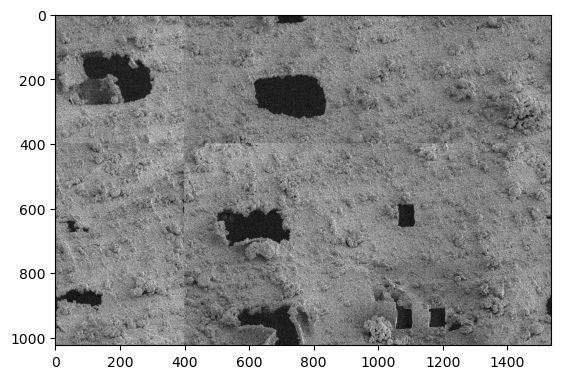

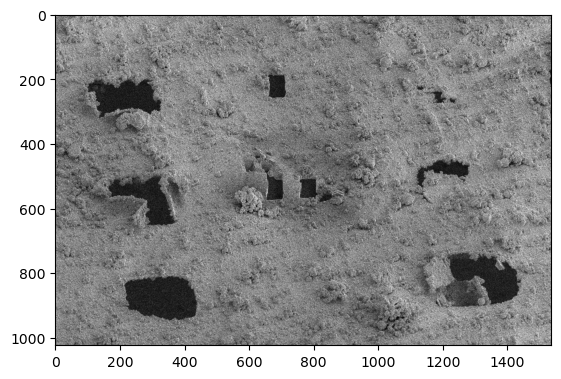

In [20]:
unroll = np.roll(img2.data, shift=(-err[0], -err[1]), axis=(0, 1))


plt.imshow(img2.data, cmap='gray')
plt.show()

plt.imshow(unroll, cmap='gray')
plt.show()